In [1]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

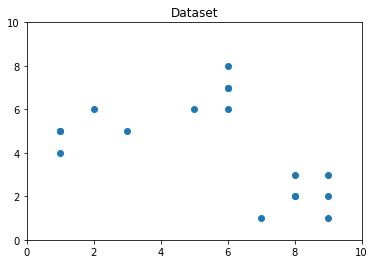

In [5]:
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)

In [6]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeanModel.inertia_


In [7]:
for key, val in mapping1.items():
    	print(f'{key} : {val}')

1 : 3.4577032384495707
2 : 1.7687413573405673
3 : 0.8819889697423957
4 : 0.8105669252775017
5 : 0.6872918402957646
6 : 0.6046508654312025
7 : 0.5078332340512092
8 : 0.4442520441076937
9 : 0.35294117647058826


Text(0.5, 1.0, 'The Elbow Method using Distortion')

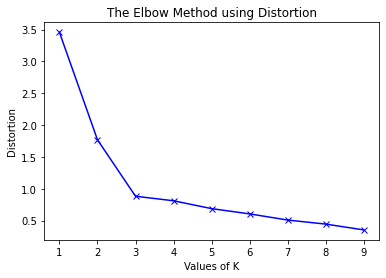

In [8]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')

In [9]:
for key, val in mapping2.items():
    	print(f'{key} : {val}')


1 : 217.64705882352942
2 : 68.42857142857142
3 : 16.22857142857143
4 : 13.133333333333333
5 : 9.599999999999998
6 : 7.166666666666666
7 : 6.000000000000001
8 : 4.166666666666667
9 : 3.0


Text(0.5, 1.0, 'The Elbow Method using Inertia')

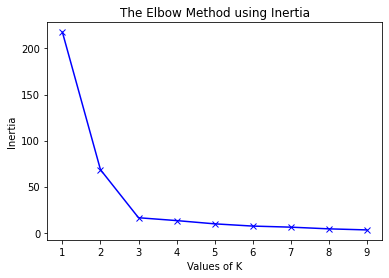

In [10]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')